In [3]:
import numpy as np
import matplotlib.pyplot as plt
from myImageLib import dirrec, bestcolor
from skimage import io
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.signal import savgol_filter
import os
from corrLib import corrS, corrI, divide_windows, distance_corr, corrIseq
from scipy.signal import savgol_filter
%matplotlib nbagg

## box size effect on spatial intensity correlation

In [4]:
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = [50, 100]
data = {}
for bs in boxsize:
    X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
    CI = corrI(X, Y, I)
    dc = distance_corr(X, Y, CI)
    data[str(bs)] = dc

<IPython.core.display.Javascript object>


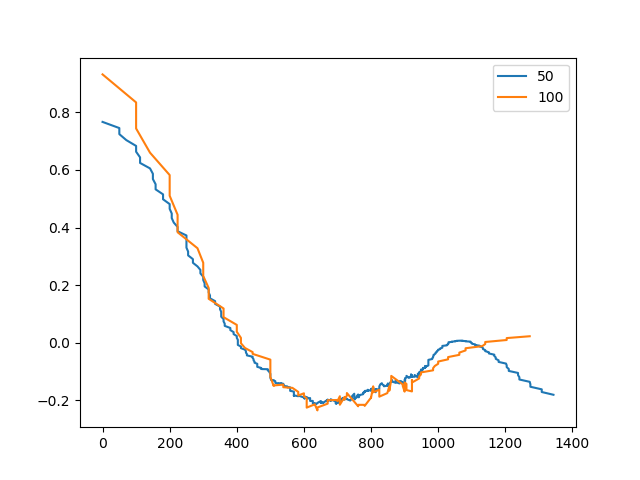

In [9]:
for kw in data:
    dc = data[kw]
    length = len(dc)
    smooth_length = int(np.ceil(length/5)*2+1)
    plt.plot(dc.R, savgol_filter(dc.C, smooth_length, 3), label=kw)
plt.legend()

* Write a function that compares the result of various boxsize

In [6]:
def boxsize_effect_spatial(img, boxsize, mpp):
    # img: the image to be tested, array-like
    # boxsize: a list of boxsize to be tested, list-like
    # mpp: microns per pixel, float
    data = {}
    for bs in boxsize:
        X, Y, I = divide_windows(img, windowsize=[bs, bs], step=bs)
        CI = corrI(X, Y, I)
        dc = distance_corr(X, Y, CI)
        bsm = bs * mpp # boxsize in microns
        dc.R = dc.R * mpp
        data['{0:.1f}'.format(bsm)] = dc
    for kw in data:
        dc = data[kw]
        length = len(dc)
        smooth_length = int(np.ceil(length/5)*2+1)
        plt.plot(dc.R, savgol_filter(dc.C, smooth_length, 3), label=kw)
    plt.legend()
    return data

<IPython.core.display.Javascript object>


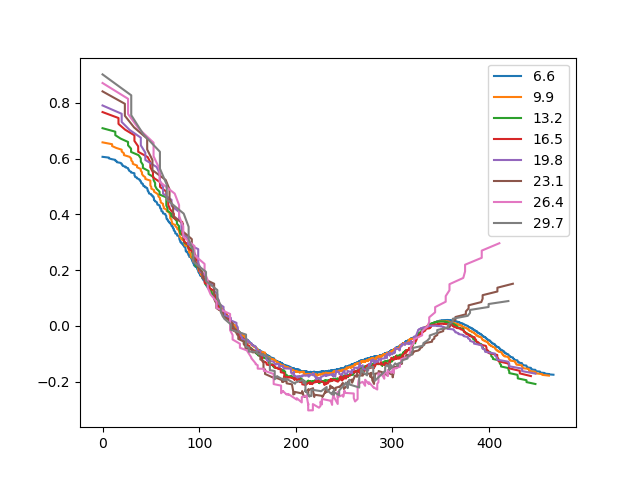

{'6.6':                R         C
 0       0.000000  1.000000
 51      6.600000  0.873309
 1       6.600000  0.860031
 52      9.333810  0.790953
 2      13.200000  0.723058
 102    13.200000  0.742037
 53     14.758049  0.682546
 103    14.758049  0.696612
 104    18.667619  0.630319
 3      19.800000  0.632137
 153    19.800000  0.665864
 54     20.871033  0.605278
 154    20.871033  0.633663
 105    23.796638  0.575712
 155    23.796638  0.592008
 204    26.400000  0.632365
 4      26.400000  0.561600
 205    27.212497  0.600502
 55     27.212497  0.543558
 156    28.001429  0.554160
 206    29.516097  0.565125
 106    29.516097  0.531063
 157    33.000000  0.523255
 207    33.000000  0.535371
 255    33.000000  0.608179
 5      33.000000  0.509905
 256    33.653529  0.578815
 56     33.653529  0.498825
 257    35.542088  0.548469
 107    35.542088  0.491049
 ...          ...       ...
 2243  435.249859  0.094920
 2593  435.249859  0.288270
 2444  438.689047 -0.673755
 2394  438.78

In [10]:
img = io.imread(r'I:\Github\Python\Correlation\test_images\boxsize_effect\0001.tif')
boxsize = range(20, 100, 10)
mpp= 0.33
boxsize_effect_spatial(img, boxsize, mpp)